Assignment 2 

In [95]:
library(ISLR)
library(MASS)
library(tree)
library(ggplot2)
library(randomForest)
library(lattice)
library(caret)
library(survival)
library(splines)
library(parallel)
library(gbm)
library(class)

Problem 1
This problem use the OJ data set which is part of the ISLR package.

a) Create a training set containing a random sample of 800 observations, and a test set
containing the remaining observations.

In [4]:
n = nrow(OJ)
p = ncol(OJ)
train <- sample(1:n, 800)
test <- (1:n)[-train]
oj_training <- OJ[train,]
oj_test <- OJ[test,]

b) Fit a tree to the training data, with Purchase as the response and the other variables as
predictors. Use the summary() function to produce summary statistics about the tree, and describe the results obtained. What is the training error rate? How many terminal nodes does the tree have?

In [7]:
rtree.oj = tree(Purchase~., data = oj_training)
summary(rtree.oj)


Classification tree:
tree(formula = Purchase ~ ., data = oj_training)
Variables actually used in tree construction:
[1] "LoyalCH"       "SalePriceMM"   "SpecialCH"     "PriceDiff"    
[5] "ListPriceDiff"
Number of terminal nodes:  9 
Residual mean deviance:  0.7505 = 593.6 / 791 
Misclassification error rate: 0.165 = 132 / 800 

**Answer:**  
**- Training Error rate: 0.165  **  
**- Number of terminal nodes: 9**


c) Type in the name of the tree object in order to get a detailed text output. Pick one of the terminal nodes, and interpret the information displayed.

In [8]:
rtree.oj

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1072.00 CH ( 0.60750 0.39250 )  
   2) LoyalCH < 0.5036 350  415.10 MM ( 0.28000 0.72000 )  
     4) LoyalCH < 0.0356415 51    0.00 MM ( 0.00000 1.00000 ) *
     5) LoyalCH > 0.0356415 299  378.30 MM ( 0.32776 0.67224 )  
      10) SalePriceMM < 2.04 160  170.60 MM ( 0.22500 0.77500 )  
        20) SpecialCH < 0.5 127  110.60 MM ( 0.15748 0.84252 ) *
        21) SpecialCH > 0.5 33   45.72 MM ( 0.48485 0.51515 ) *
      11) SalePriceMM > 2.04 139  191.10 MM ( 0.44604 0.55396 )  
        22) LoyalCH < 0.277977 52   53.66 MM ( 0.21154 0.78846 ) *
        23) LoyalCH > 0.277977 87  118.00 CH ( 0.58621 0.41379 ) *
   3) LoyalCH > 0.5036 450  360.80 CH ( 0.86222 0.13778 )  
     6) LoyalCH < 0.764572 180  212.70 CH ( 0.72222 0.27778 )  
      12) PriceDiff < -0.165 27   30.90 MM ( 0.25926 0.74074 ) *
      13) PriceDiff > -0.165 153  151.40 CH ( 0.80392 0.19608 )  
        26) ListPriceDiff < 0.135 30   41.4

**Answer:  **
- node), split, n, deviance, yval, (yprob) * denotes terminal node  
- 4) LoyalCH < 0.0356415 51    0.00 MM ( 0.00000 1.00000 ) *  
    - LoyalCH is the predictor variable used for spliting. It means that if one value with LoyalCH less than   0.0356415, this value will be splited into this node.   
    - There are 51 rows of values in this node.  
    - The deviance means total deviance of each tree. For this tree the deviance(error rate) is 0.  
    - The predicted class is 'MM'  
    - The probability of winning class('MM') is 100%.  
    - An asterisk (*) indicates that this node is a terminal node.

d) Create a plot of the tree, and interpret the results.

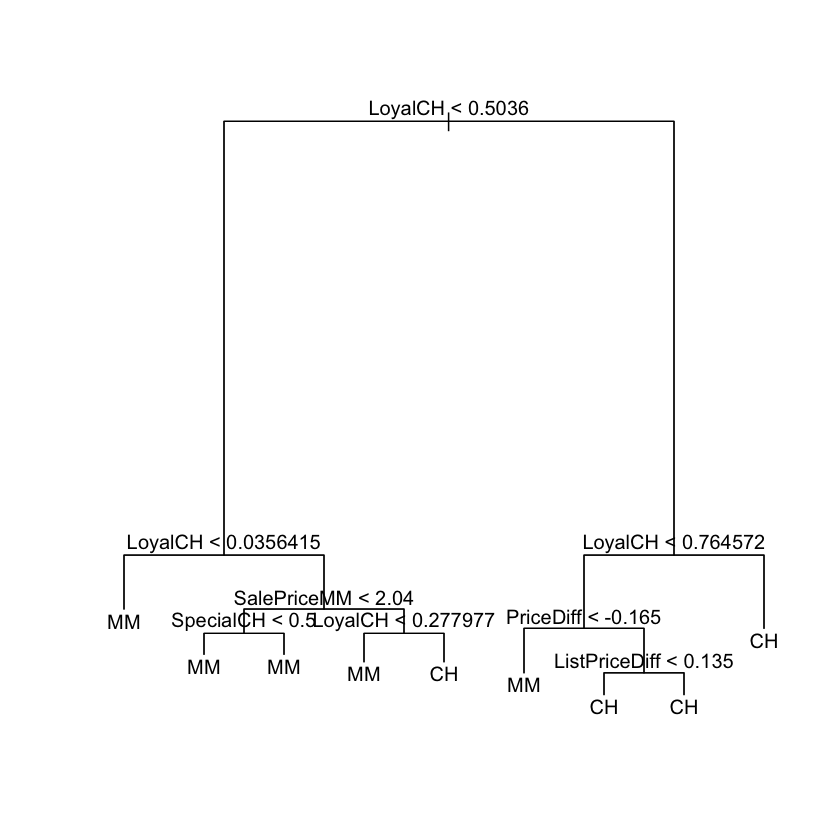

In [9]:
plot(rtree.oj)
text(rtree.oj, pretty = 0)

**Answer:
1. root 800 1072.00 CH ( 0.60750 0.39250 )  
    1.1 If LoyalCH < 0.5036, 'MM' is the predicted result.   
        1.1.1 If LoyalCH < 0.0356415 MM is the predicted result.  
        1.1.2 If LoyalCH > 0.0356415 MM is the predicted result.  
            1.1.2.1 If SalePriceMM < 2.04 MM is the predicted result.  
                1.1.2.1.1 If SpecialCH < 0.5 MM is the predicted result.  
                1.1.2.1.2 If SpecialCH > 0.5 MM is the predicted result.  
            1.1.2.2 If SalePriceMM > 2.04 MM is the predicted result.  
                1.1.2.2.1 If LoyalCH < 0.277977 MM is the predicted result.  
                1.1.2.2.2 If LoyalCH > 0.277977 CH is the predicted result.  
    1.2 If LoyalCH > 0.5036 CH is the predicted result.    
        1.2.1 If LoyalCH < 0.764572 CH is the predicted result.  
            1.2.1.1 If PriceDiff < -0.165 MM is the predicted result.  
            1.2.1.2 If PriceDiff > -0.165 CH is the predicted result.    
                1.2.1.2.1 If ListPriceDiff < 0.135 CH is the predicted result.  
                1.2.1.2.2 If ListPriceDiff > 0.135 CH is the predicted result.  
        1.2.2 If LoyalCH > 0.764572 CH is the predicted result.  

e) Predict the response on the test data, and produce a confusion matrix comparing the
test labels to the predicted test labels. What is the test error rate?

In [14]:
rtree.pred = predict(rtree.oj, newdata=oj_test, type='class')
xtab<-table(rtree.pred,oj_test)
confusionMatrix(xtab)

Confusion Matrix and Statistics

          
rtree.pred  CH  MM
        CH 146  21
        MM  21  82
                                          
               Accuracy : 0.8444          
                 95% CI : (0.7956, 0.8855)
    No Information Rate : 0.6185          
    P-Value [Acc > NIR] : 3.23e-16        
                                          
                  Kappa : 0.6704          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8743          
            Specificity : 0.7961          
         Pos Pred Value : 0.8743          
         Neg Pred Value : 0.7961          
             Prevalence : 0.6185          
         Detection Rate : 0.5407          
   Detection Prevalence : 0.6185          
      Balanced Accuracy : 0.8352          
                                          
       'Positive' Class : CH              
                                          

f) Apply the cv.tree() function to the training set in order to determine the optimal tree
size.

In [15]:
cvtree.oj <- cv.tree(rtree.oj, K=100)

g) Produce a plot with tree size on the x-axis and cross-validated classification error rate on
the y-axis.

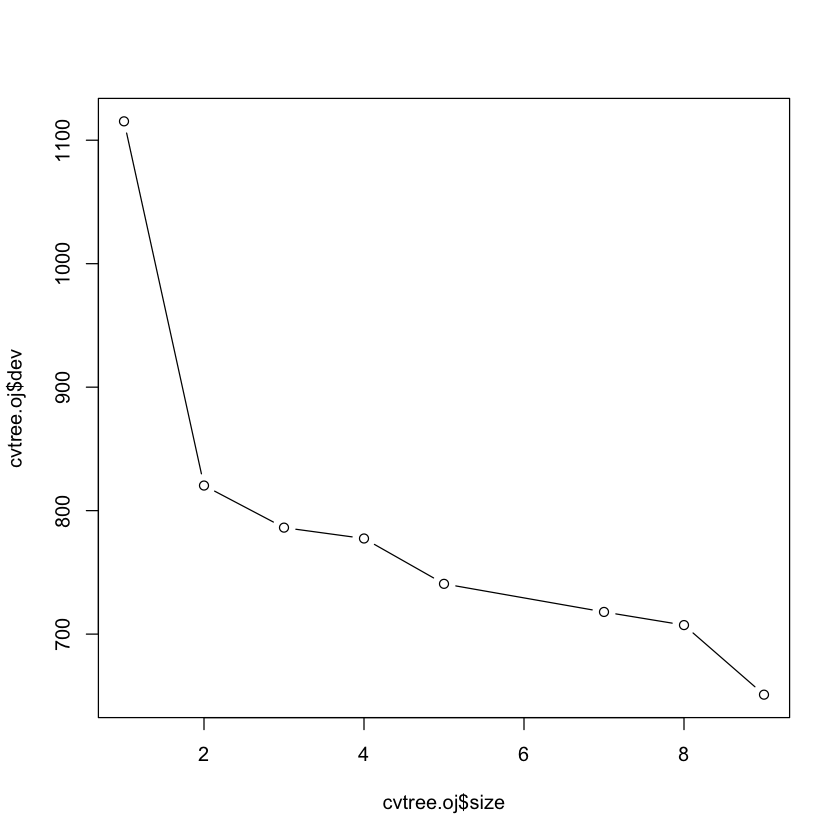

In [17]:
plot(cvtree.oj$size, cvtree.oj$dev, type='b')

Problem 2
This problem use the Caravan data set which is part of the ISLR package.

a) Create a training set consisting of the first 1,000 observations, and a test set consisting
of the remaining observations.

In [161]:
n <- nrow(Caravan)
p <- ncol(Caravan)
Caravan_data <- Caravan
Caravan_data$Purchase<-sub(pattern = 'No', replacement=0, Caravan_data$Purchase)
Caravan_data$Purchase<-sub(pattern = 'Yes', replacement=1, Caravan_data$Purchase)
caravan_training <- Caravan_data[1:1000,]
caravan_test <- Caravan_data[1000:n,]
caravan.test <- Caravan[1000:n,'Purchase']

b) Fit a boosting model to the training set with Purchase as the response and the other
variables as predictors. Use 1,000 trees, and a shrinkage value of 0.01. Which predictors
appear to be the most important?

,var,rel.inf
PPERSAUT,PPERSAUT,14.6350478
MKOOPKLA,MKOOPKLA,9.4709165
MOPLHOOG,MOPLHOOG,7.3145742
MBERMIDD,MBERMIDD,6.0865197
PBRAND,PBRAND,4.6676612
MGODGE,MGODGE,4.4946326
ABRAND,ABRAND,4.3242776
MINK3045,MINK3045,4.1759062
MOSTYPE,MOSTYPE,2.8640258
PWAPART,PWAPART,2.7819107


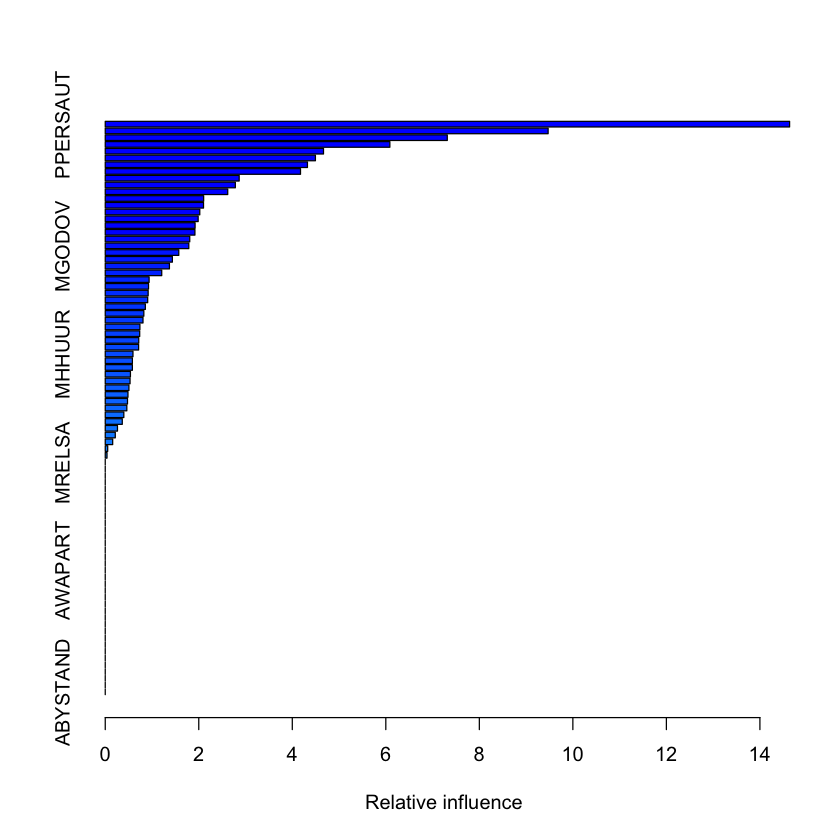

In [255]:
set.seed(1)
boost.caravan=gbm(Purchase~., data=caravan_training, distribution = 'bernoulli', n.trees=1000, shrinkage=0.01)
summary(boost.caravan)

**Answer:  
PRERSAUT appear to be the most important.**

c) Use the boosting model to predict the response on the test data. Predict that a person
will make a purchase if the estimated probability of purchase is greater than 20 %. Form a confusion matrix. What fraction of the people predicted to make a purchase do in fact make one? How does this compare with the results obtained from applying KNN or logistic regression to this data set?

In [256]:
boost.probs = predict(boost.caravan, newdata=caravan_test, n.trees=1000, type='response')
boost.probs[boost.probs>0.2]<-'Yes'
boost.probs[boost.probs<=0.2]<-'No'
boost.pred <- boost.probs
xtab <- table(boost.pred, caravan.test)
confusionMatrix(xtab)

KNN:

In [261]:
test_predictors<-caravan_test[colnames(caravan_test)!='Purchase']
test.x =cbind(test_predictors)
training_predictors<-caravan_training[colnames(caravan_test)!='Purchase']
training.x=cbind(train_predictors)
knn.pred=knn(training.x,test.x,caravan_training$Purchase,k=1)
xtab<-table(knn.pred ,caravan_test$Purchase)
confusionMatrix(xtab)

Confusion Matrix and Statistics

        
knn.pred    0    1
       0 4259  263
       1  275   26
                                          
               Accuracy : 0.8885          
                 95% CI : (0.8792, 0.8972)
    No Information Rate : 0.9401          
    P-Value [Acc > NIR] : 1.0000          
                                          
                  Kappa : 0.0288          
 Mcnemar's Test P-Value : 0.6353          
                                          
            Sensitivity : 0.93935         
            Specificity : 0.08997         
         Pos Pred Value : 0.94184         
         Neg Pred Value : 0.08638         
             Prevalence : 0.94008         
         Detection Rate : 0.88306         
   Detection Prevalence : 0.93759         
      Balanced Accuracy : 0.51466         
                                          
       'Positive' Class : 0               
                                          

Logistic Regression

In [280]:
caravan_training<-cbind(caravan_training)
caravan_training$Purchase<-as.numeric(caravan_training$Purchase)
glm.caravan = glm(Purchase~., family=binomial, data=caravan_training)
glm.probs=predict(glm.caravan, newdata=caravan_test, type='response')
glm.pred=rep('No', dim(caravan_test)[1])
glm.pred[glm.probs>0.2]='Yes'
xtab<-table(glm.pred, caravan.test)
confusionMatrix(xtab)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

Confusion Matrix and Statistics

        caravan.test
glm.pred   No  Yes
     No  4184  231
     Yes  350   58
                                        
               Accuracy : 0.8795        
                 95% CI : (0.87, 0.8886)
    No Information Rate : 0.9401        
    P-Value [Acc > NIR] : 1             
                                        
                  Kappa : 0.1035        
 Mcnemar's Test P-Value : 9.807e-07     
                                        
            Sensitivity : 0.9228        
            Specificity : 0.2007        
         Pos Pred Value : 0.9477        
         Neg Pred Value : 0.1422        
             Prevalence : 0.9401        
         Detection Rate : 0.8675        
   Detection Prevalence : 0.9154        
      Balanced Accuracy : 0.5617        
                                        
       'Positive' Class : No            
                                        

**Answer:  
Boosting Accuracy = 92.14%  
KNN Accuracy = 88.85%  
Logistic Regression Accuracy = 87.95%  
So, Boosting algorithms is relatively better.**